Each image  takes about 2-3 minutes to run on the full datanbase
<###############################################################>
Cheking the first image against the databse
The best match with  96 similarities


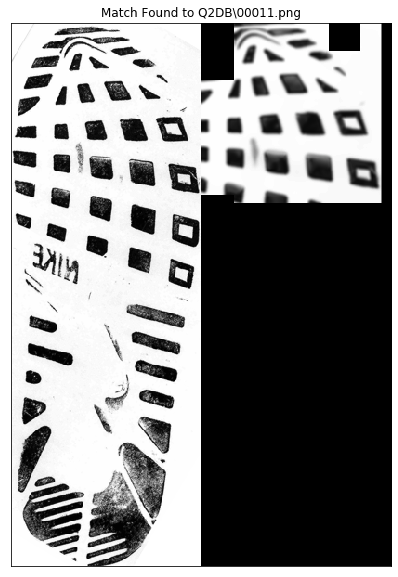

Cheking the secound image against the databse
The best match with  63 similarities


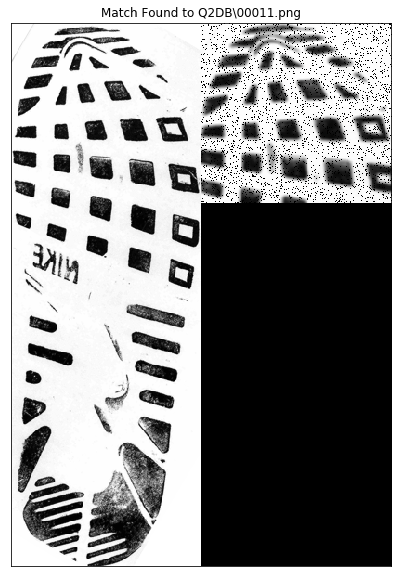

Cheking the third image against the databse
The best match with  19 similarities


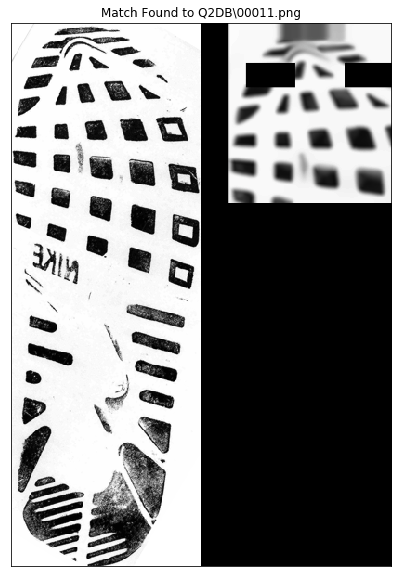

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
# import the necessary packages
from skimage.measure import compare_ssim
path1 = glob.glob("Q3Images/*.png")
path2 = glob.glob("Q2DB/*.png")
cv_img = []
Image_DB=[]
image_set1=[]
image_set2=[]
max_found_value=[]


 
def Read_img(path_to_directory,db,read):
    for img in path_to_directory:
        n = cv2.imread(img)
        if(read==1):
            n=cv2.fastNlMeansDenoisingColored(n,None,10,10,7,21)
            
        
        db.append(n) 

def concatenate(img1,img2,shape):
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]

#create empty matrix
    vis = np.zeros((max(h1, h2), w1+w2,3), np.uint8)

#combine 2 images
    vis[:h1, :w1,:3] = img1
    vis[:h2, w1:w1+w2,:3] = img2
    return vis

    
def showImages(ImgDB,title):
    fig=plt.figure(figsize=(10, 10))
    plt.imshow(ImgDB)
    plt.xticks([]), plt.yticks([])
    plt.title(title)
    plt.show()
def Detect_and_compare():
    print('Each image  takes about 2-3 minutes to run on the full datanbase')
    print('<###############################################################>')
    sift = cv2.xfeatures2d.SIFT_create()
    found=0
    j=0
    for img1 in cv_img:
        sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
        sharpen = cv2.filter2D(img1, -1, sharpen_kernel)
        k=0
        j+=1
        i=1
        kp_1, desc_1 = sift.detectAndCompute(sharpen, None)
        max_found_value=[]
        if(j==1):
            print('Cheking the first image against the databse')
        if(j==2):
            print('Cheking the secound image against the databse')
        if(j==3):
            print('Cheking the third image against the databse')    
        for img2 in Image_DB:
                i+=1
                kp_2, desc_2 = sift.detectAndCompute(img2, None)
                index_params = dict(algorithm=2, trees=5)
                search_params = dict(checks=60)
                flann = cv2.FlannBasedMatcher(index_params, search_params)      
                matches = flann.knnMatch(desc_1, desc_2, k=2)
                good_points = []
                ratio = 0.8
                for m, n in matches:
                    if m.distance < ratio*n.distance:
                        good_points.append(m)
                max_found_value.append(len(good_points))
                
                k+=1
                if(i==len(Image_DB)): #and found==0):
                    print("The best match with ",max(max_found_value),"similarities")
                    a=max_found_value.index(max(max_found_value))
                    
                    final=concatenate(Image_DB[a],cv_img[j-1],1)
                    str="Match Found to "+path2[a]
                    showImages(final,str)
Read_img(path1,cv_img,1)
Read_img(path2,Image_DB,0)
Detect_and_compare()
